In [1]:
import pandas as pd
import numpy as np

In [ ]:
test = pd.DataFrame(np.array([['TGCCGCTAGAGGACGCCGTGGCCGCGCTCAGCGGTGCCGCTAGAGG', 'PAX4', 'GCCGTGG'], ['TGCCGCTAGAGGACGCCGTGGCCGCGCTCAGCGGTGCCGCTAGAGG', 'PAX3', 'TAGA'], ['TGCCGCTAGAGGACGCCGTGGCCGCGCTCAGCGGTGCCGCTAGAGG', 'ETV1', 'CGGTGCC'], ['TGCCGCTAGAGGACGCCGTGGCCGCGCTCAGCGGTGCCGCTAGAGG', 'RARA', 'TAGAGGT']]))
test

In [3]:
test.columns = ['Artificial_promoter_sequence', 'TF', 'TF_sequence']

In [ ]:
test

In [116]:
final = []
for target, i in zip(test['Artificial_promoter_sequence'], test['TF_sequence']):
    try:
        if type(target.index(i)) == int:
            change = ''
            for j in range(len(i)):
                change += 'x'
            target = target.replace(i, change)
            final.append(target)
    except:
        final.append(target)
        continue

In [9]:
final = []
for target, i in zip(test['Artificial_promoter_sequence'], test['TF_sequence']):
    try:
        if type(target.index(i)) == int:
            target = target[:target.index(i)] + '*' + i + '*' + target[target.index(i)+len(i):]
            final.append(target)
    except:
        final.append(target)
        continue

In [10]:
final

['TGCCGCTAGAGGAC*GCCGTGG*CCGCGCTCAGCGGTGCCGCTAGAGG',
 'TGCCGC*TAGA*GGACGCCGTGGCCGCGCTCAGCGGTGCCGCTAGAGG',
 'TGCCGCTAGAGGACGCCGTGGCCGCGCTCAG*CGGTGCC*GCTAGAGG',
 'TGCCGCTAGAGGACGCCGTGGCCGCGCTCAGCGGTGCCGCTAGAGG']

In [ ]:
test['Artificial_promoter_sequence'] = final
test

In [18]:
sequence = "TGCCGCTAGAGGACGCCGTGGCCGCGCTCAGCGGTGCCGCTAGAGG"
sequence.index('CGGTGCC')

31

In [ ]:
GraphicFeature(start=0, end=20, strand=+1, color="#ffd700",
                   label="Small feature")

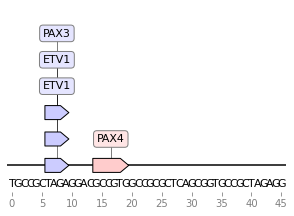

In [24]:
from dna_features_viewer import GraphicFeature, GraphicRecord

sequence = "TGCCGCTAGAGGACGCCGTGGCCGCGCTCAGCGGTGCCGCTAGAGG"
record = GraphicRecord(sequence=sequence, features=[
    GraphicFeature(start=14, end=20, strand=+1, color='#ffcccc', label = 'PAX4'),
    GraphicFeature(start=6, end=10, strand=+1, color='#ccccff', label = 'PAX3'),
    GraphicFeature(start=6, end=10, strand=+1, color='#ccccff', label = 'ETV1'),
    GraphicFeature(start=6, end=10, strand=+1, color='#ccccff', label = 'ETV1')
])

ax, _ = record.plot(figure_width=5)
record.plot_sequence(ax)
ax.figure.savefig('sequence_and_translation.png', bbox_inches='tight')
